# Subsimulation learning rate

In [19]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.optimize import curve_fit
from scipy.stats import truncnorm

import numba as nb

In [3]:
from sedgen import initialization as ini
from sedgen import general as gen
from sedgen import preprocessing

In [4]:
%load_ext line_profiler
%load_ext memory_profiler

In [5]:
# Load jupyter extension to reload packages before executing user code.
# https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html
%load_ext autoreload
# Reload all packages (except those excluded by %aimport) every time 
# before executing the Python code typed.
%autoreload 2

____

In [7]:
sedgen_CA_NS = preprocessing.load_obj("sedgen_CA_NS_model")

In [11]:
sedgen_CA_NS.csds[0]

In [41]:
cvd_mean_0 = np.exp(gen.calculate_volume_sphere(np.log(sedgen_CA_NS.csd_means[0])))
cvd_std_0 = np.log(gen.calculate_volume_sphere(np.exp(sedgen_CA_NS.csd_stds[0])))
trunc_left = gen.calculate_volume_sphere(1/256)
trunc_right = gen.calculate_volume_sphere(30)

In [17]:
def initialize_csd(mean, std, trunc_left=1/256, trunc_right=30):
    """Initalizes the truncated lognormal crystal size distribution

    Parameters:
    -----------
    m : int
        Number specifying mineral class
    trunc_left : float(optional)
        Value to truncate lognormal distribution to on left side,
        i.e. smallest values
    trunc_right : float(optional)
        Value to truncate lognormal distribution to on right side,
        i.e. biggest values

    Returns:
    --------
    csd : scipy.stats.truncnorm
        Truncated lognormal crystal size distribution
    """

    mean = np.log(mean)
    std = np.exp(std)

    if not np.isinf(trunc_left):
        trunc_left = np.log(trunc_left)

    if not np.isinf(trunc_right):
        trunc_right = np.log(trunc_right)

    a, b = (trunc_left - mean) / std, (trunc_right - mean) / std
    csd = truncnorm(loc=mean, scale=std, a=a, b=b)

    return csd

In [42]:
cvd_trunc = initialize_csd(cvd_mean_0, cvd_std_0, trunc_left, trunc_right)

(array([  9627.,  24831.,  53424.,  95387., 141534., 174617., 178533.,
        151640., 107360.,  63047.]),
 array([-17.28133862, -14.59755937, -11.91378012,  -9.23000087,
         -6.54622163,  -3.86244238,  -1.17866313,   1.50511612,
          4.18889537,   6.87267462,   9.55645387]),
 <BarContainer object of 10 artists>)

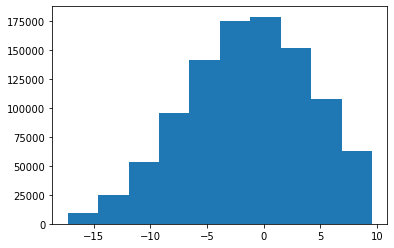

In [43]:
plt.hist(cvd_trunc.rvs(1_000_000))

(array([ 37527.,  68092., 105624., 142166., 162119., 159464., 134454.,
         97172.,  60685.,  32697.]),
 array([-17.28248607, -14.59858715, -11.91468824,  -9.23078932,
         -6.5468904 ,  -3.86299148,  -1.17909256,   1.50480636,
          4.18870528,   6.8726042 ,   9.55650312]),
 <BarContainer object of 10 artists>)

(array([  9609.,  24883.,  53580.,  95637., 141696., 174426., 177999.,
        151740., 107536.,  62894.]),
 array([-17.2821743 , -14.59830967, -11.91444504,  -9.23058041,
         -6.54671577,  -3.86285114,  -1.17898651,   1.50487813,
          4.18874276,   6.87260739,   9.55647202]),
 <BarContainer object of 10 artists>)

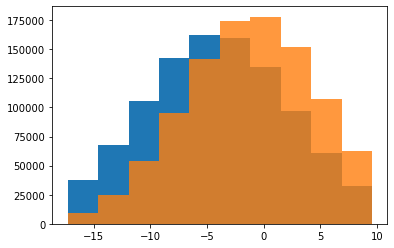

In [46]:
plt.hist(np.log(gen.calculate_volume_sphere(np.exp(sedgen_CA_NS.csds[0].rvs(1_000_000)))))
plt.hist(cvd_trunc.rvs(1_000_000), alpha=0.8)